In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import utils
import xarray as xr
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
sites_files = list(Path('/home/callum/Documents/hack/olamur_process/data_from_cruise/quinsy/LogFiles').glob('*Manual_Fix*.txt'))
quinsy = pd.DataFrame()
for fn in sites_files:
    quinsy_add = pd.read_csv(fn, parse_dates=[['Date', 'Time']])
    quinsy = pd.concat((quinsy, quinsy_add))
quinsy = quinsy[quinsy['A-Frame_Extended Longitude']<13]
quinsy.to_csv('data_cleaned/quinsy.csv', index=False)

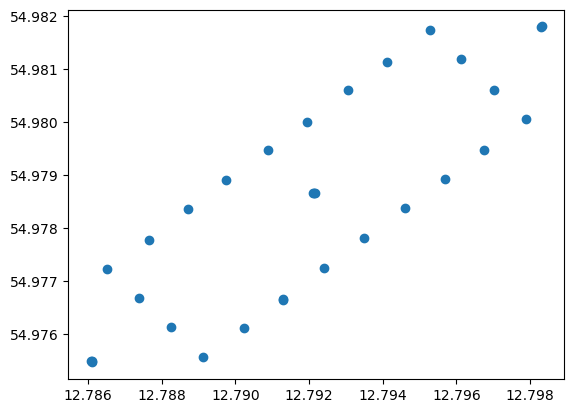

In [3]:
plt.scatter(quinsy['A-Frame_Extended Longitude'], quinsy['A-Frame_Extended Latitude'])

In [4]:
yuco_files = list(Path('data_from_cruise/yuco/exports/YUCO-00410025').glob('*/*.csv'))
yuco_files

[PosixPath('data_from_cruise/yuco/exports/YUCO-00410025/20230912_140317_1_OLAMUR 004_WPT/dataset_20230912_140317_1_OLAMUR 004_WPT.csv'),
 PosixPath('data_from_cruise/yuco/exports/YUCO-00410025/20230911_163149_1_OLAMUR_Test/dataset_20230911_163149_1_OLAMUR_Test.csv'),
 PosixPath('data_from_cruise/yuco/exports/YUCO-00410025/20230912_132328_1_OLAMUR 004_WPT/dataset_20230912_132328_1_OLAMUR 004_WPT.csv'),
 PosixPath('data_from_cruise/yuco/exports/YUCO-00410025/20230914_104624_1_OLAMUR SD13_001_WPT/dataset_20230914_104624_1_OLAMUR SD13_001_WPT.csv'),
 PosixPath('data_from_cruise/yuco/exports/YUCO-00410025/20230914_090642_1_OLAMUR 004_WPT/dataset_20230914_090642_1_OLAMUR 004_WPT.csv'),
 PosixPath('data_from_cruise/yuco/exports/YUCO-00410025/20230914_100045_1_OLAMUR 004_WPT_partial/dataset_20230914_100045_1_OLAMUR 004_WPT_partial.csv'),
 PosixPath('data_from_cruise/yuco/exports/YUCO-00410025/20230914_120323_1_OLAMUR SD3_001_WPT/dataset_20230914_120323_1_OLAMUR SD3_001_WPT.csv'),
 PosixPath('d

In [5]:
yuco = pd.DataFrame()
for fn in yuco_files:
    yuco_add = pd.read_csv(fn)
    yuco = pd.concat((yuco, yuco_add))
yuco.dropna(how='all', axis=1, inplace=True)
yuco = yuco[yuco['INX Latitude (�)'] > 50]
yuco = yuco[yuco['INX Latitude (�)'] < 55]

yuco = yuco[yuco['INX Longitude (�)'] > 10]
yuco = yuco[yuco['AUV Status'] =='MISSION']
# check the two lats, check good/bad gps
# oxygen is weird, spikes, steps
# salinity correction for oxgyen
# check pressure sensors
# altitude
# velocities are weird
yuco['datetime'] = pd.to_datetime(yuco['Timestamp (s) UTC+0'],  unit='s')
yuco = yuco.sort_values('datetime')
yuco.index = np.arange(len(yuco))

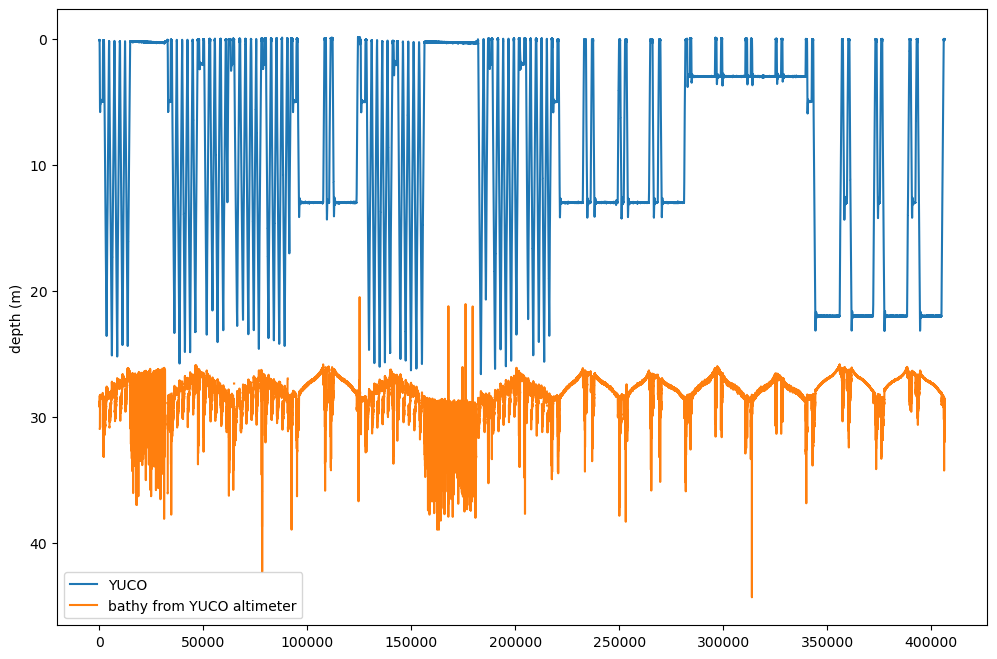

In [6]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(yuco.index, yuco['Depth (m)'], label="YUCO")
ax.plot(yuco.index, yuco['Depth (m)'] +  yuco['Altitude (m)'], label="bathy from YUCO altimeter")
ax.set(ylabel="depth (m)")
ax.legend()
ax.invert_yaxis()

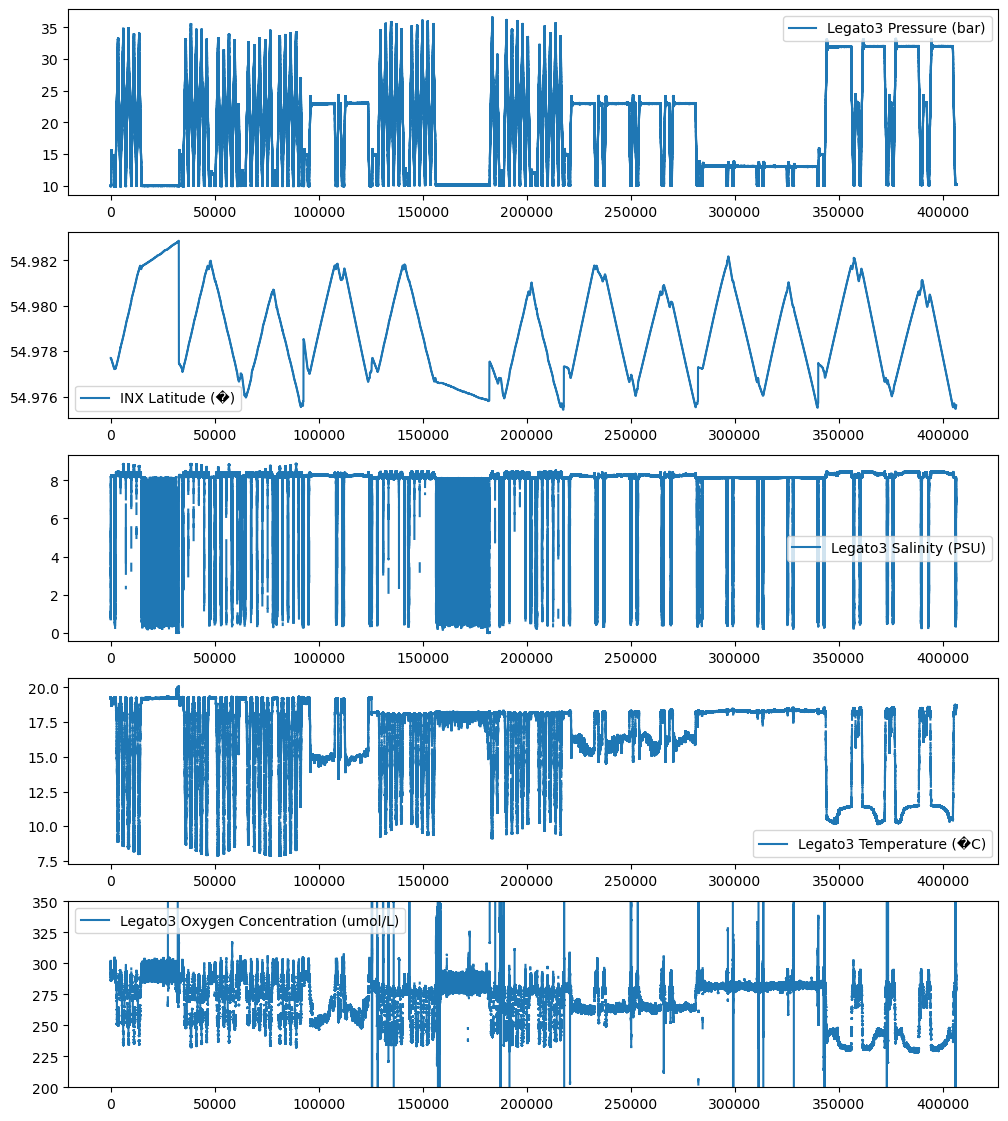

In [7]:
plot_vars =  ['Legato3 Pressure (bar)', 
              'INX Latitude (�)',
 'Legato3 Salinity (PSU)',
 'Legato3 Temperature (�C)',
 'Legato3 Oxygen Concentration (umol/L)',
]
fig, axs = plt.subplots(len(plot_vars), 1, figsize = (12, 14))
axs = axs.ravel()

for i, var in enumerate(plot_vars):
    ax = axs[i]
    ax.plot(yuco.index, yuco[var], label=var)
    #ax.set(ylabel = var)
    ax.legend()
    #ax.invert_yaxis()
ax.set(ylim=(200, 350));

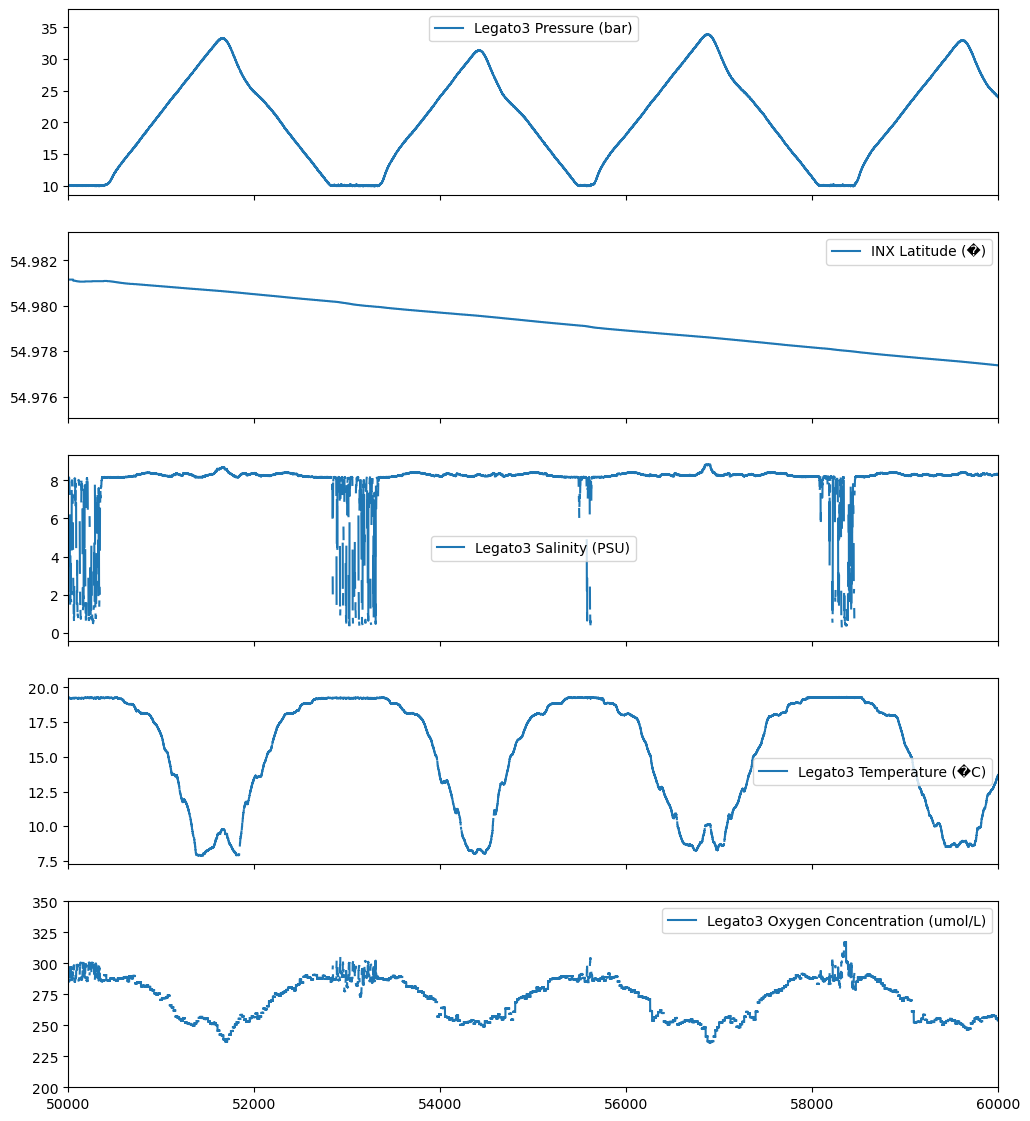

In [8]:
plot_vars =  ['Legato3 Pressure (bar)', 
              'INX Latitude (�)',
 'Legato3 Salinity (PSU)',
 'Legato3 Temperature (�C)',
 'Legato3 Oxygen Concentration (umol/L)',
]
fig, axs = plt.subplots(len(plot_vars), 1, figsize = (12, 14), sharex="col")
axs = axs.ravel()

for i, var in enumerate(plot_vars):
    ax = axs[i]
    ax.plot(yuco.index, yuco[var], label=var)
    #ax.set(ylabel = var)
    ax.legend()
    #ax.invert_yaxis()
ax.set(ylim=(200, 350), xlim=(50000, 60000));

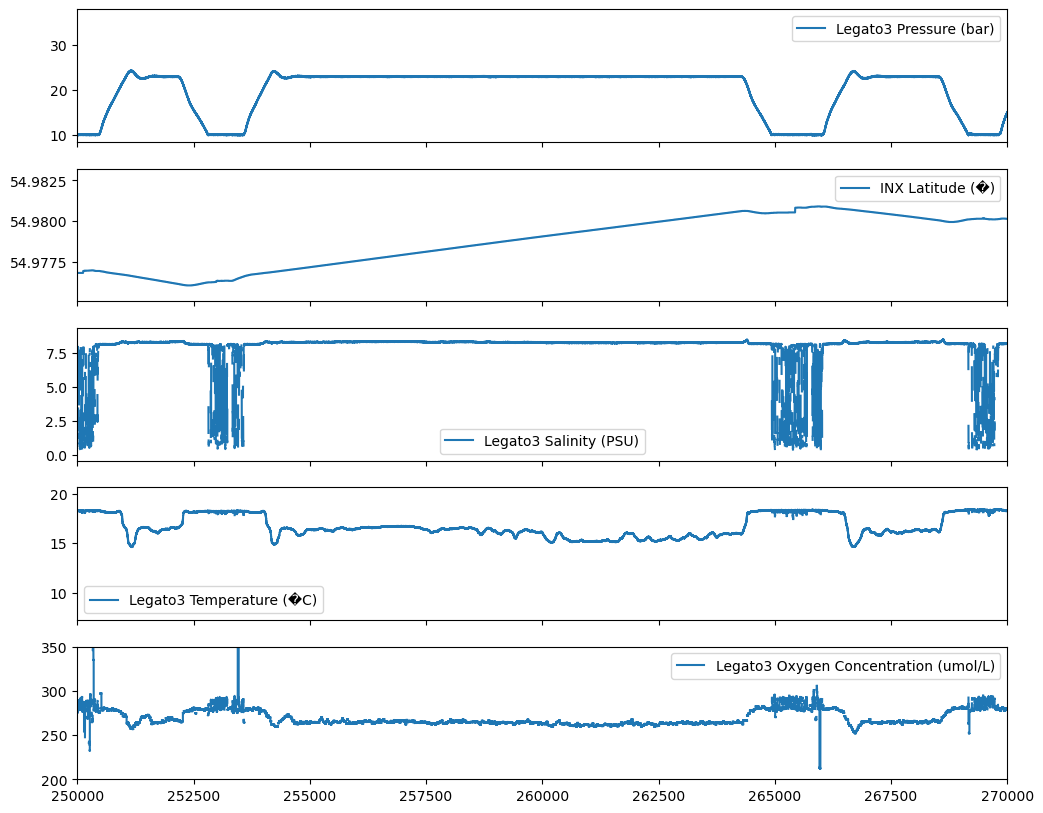

In [9]:
plot_vars =  ['Legato3 Pressure (bar)', 
              'INX Latitude (�)',
 'Legato3 Salinity (PSU)',
 'Legato3 Temperature (�C)',
 'Legato3 Oxygen Concentration (umol/L)',
]
fig, axs = plt.subplots(len(plot_vars), 1, figsize = (12, 10), sharex="col")
axs = axs.ravel()

for i, var in enumerate(plot_vars):
    ax = axs[i]
    ax.plot(yuco.index, yuco[var], label=var)
    #ax.set(ylabel = var)
    ax.legend()
    #ax.invert_yaxis()
ax.set(ylim=(200, 350), xlim=(250000, 270000));

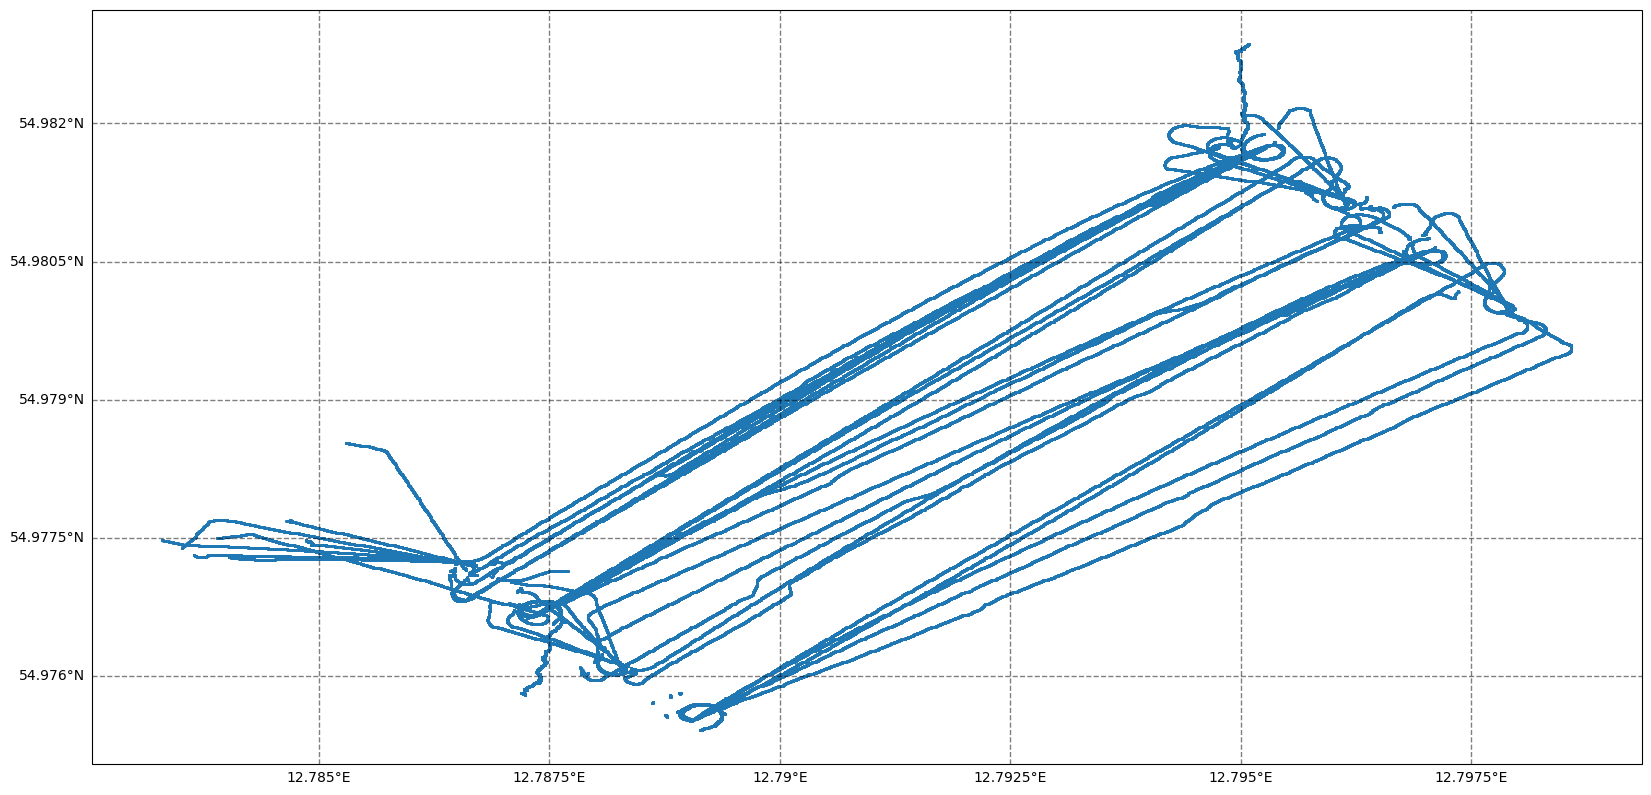

In [10]:
coord = ccrs.PlateCarree()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=coord)
#ax.set_extent([18.78, 18.805, 54.95, 55], crs=coord)
#ax.scatter(sites.lon, sites.lat)
ax.scatter(yuco['INX Longitude (�)'], yuco['INX Latitude (�)'], s=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True

In [11]:
yuco.to_csv('data_cleaned/yuco.csv')

# CTD

In [12]:
ctd_files = list(Path('data_from_cruise/ctd/').glob('*.TOB'))


In [13]:
def clean_csv(fn):
    with open(fn,encoding = "ISO-8859-1") as fp:
        for i, line in enumerate(fp):
            if 'Datasets' in line:
                variables_line = line
            if '[ Volt]' in line:
                units_line = line
            if '          1 ' in line:
                skips = i
                break
    variables = variables_line.split()[2:]
    units = units_line.replace(' ', '')[2:-2].split('][')
    var_names = ['sample [number]'] + [f'{var} [{unit}]' for var, unit in zip(variables, units)]
    df = pd.read_csv(fn, skiprows=skips,  encoding = "ISO-8859-1", names = var_names, parse_dates = [['IntD [Date]', 'IntT [Time]']], delim_whitespace=True)
    df = df.rename({'IntD [Date]_IntT [Time]': "datetime"}, axis=1)
    
    if not 'DO [μmol/L]' in list(df):
        df['DO [μmol/L]'] = df['DO_mg [mg/l]'] * 31.252
    cast_name = fn.name.split('.')[-2]
    cast_loc = cast_name.split('_')[-2]
    loc_df = quinsy[quinsy['[Mainline] Name']==cast_loc]
    df["latitude"] = loc_df['A-Frame_Extended Latitude'].mean()
    df["longitude"] = loc_df['A-Frame_Extended Longitude'].mean()
    fn_out = Path(f'data_cleaned/ctd/csv/{cast_name}.csv')
    df.to_csv(fn_out, index=False)
    df["cast_name"] = cast_name

    return df
df_ctd = pd.DataFrame()
for fn in ctd_files:
    df_add = clean_csv(fn)
    df_ctd = pd.concat((df_ctd, df_add))



In [14]:
df_ctd = df_ctd.sort_values("datetime")
df_ctd.index = np.arange(len(df_ctd))
df_ctd["cast_number"] = 0
for i, cast_name in enumerate(df_ctd.cast_name.unique()):
    df_ctd.loc[df_ctd.cast_name == cast_name, "cast_number"] = i
    

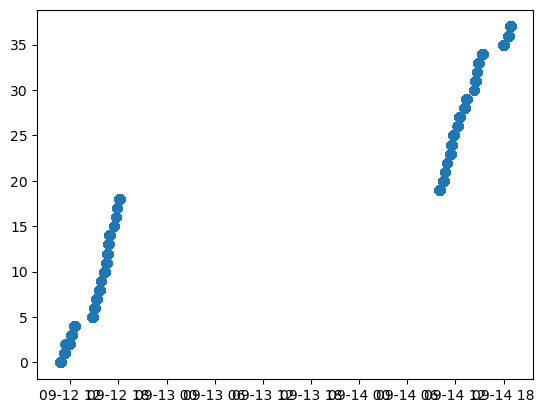

In [15]:
plt.scatter(df_ctd.datetime, df_ctd.cast_number)

In [16]:
def ds_from_df(df):
    ds = xr.Dataset()
    time_attr = {"name": "time"}
    ds['time'] = ('time', df["datetime"], time_attr)

    for col_name in list(df):
        if col_name in utils.clean_names.keys():
            name = utils.clean_names[col_name]
            ds[name] = ('time', df[col_name], utils.attrs_dict[name])
    ds.attrs = utils.attrs
    ds = utils.encode_times(ds)
    return ds
ds_ctd = ds_from_df(df_ctd)
ds_ctd.to_netcdf("data_cleaned/ctd/nc/ctd_timeseries.nc")

In [17]:
df_clean = ds_ctd.to_pandas()
df_clean["datetime"] = df_clean.index

In [18]:
ds = xr.Dataset()
casts = df_ctd.cast_number.unique()
box_depth = 1
pressure_bins = np.arange(0.5, 31.5, box_depth)
ds['cast_number'] = ('cast_number', casts, {"name": "cast_number"})
ds['pressure_bin'] = ('pressure_bin',pressure_bins, {"name": "pressure_bin"})
vars = list(ds_ctd)
vars.append("datetime")

for name in vars:
    if "cast" in name:
        continue
    if name == "datetime":
        values = np.empty((len(pressure_bins), len(casts)), dtype=datetime.datetime)
    else:
        values = np.empty((len(pressure_bins), len(casts)))
    pressure = df_clean['pressure']
    for i, cast_num in enumerate(casts):
        df_cast = df_clean[df_clean.cast_number == cast_num]
        for j, pressure_centre in enumerate(pressure_bins):
            max_pressure = pressure_centre + 0.5 * box_depth
            min_pressure = pressure_centre - 0.5 * box_depth
            min_box = df_cast[df_cast.pressure >= min_pressure]
            box = min_box[min_box.pressure < max_pressure]
            if box[name].dtype =='<M8[ns]':
                try:
                    values[j, i] = box[name].values[0]
                except:
                    values[j, i] = None
            else:
                values[j, i] = np.nanmean(box[name])
    ds[name] = (('pressure_bin', 'cast_number'), values, utils.attrs_dict[name])
ds.attrs = utils.attrs
ds_ctd_gridded = ds
ds_ctd_gridded.to_netcdf("data_cleaned/ctd/nc/ctd_gridded.nc")

/tmp/ipykernel_39928/3253344710.py:31: RuntimeWarning: Mean of empty slice
  values[j, i] = np.nanmean(box[name])
/home/callum/mambaforge/envs/olamur/lib/python3.11/site-packages/xarray/coding/times.py:618: RuntimeWarning: invalid value encountered in cast
  int_num = np.asarray(num, dtype=np.int64)


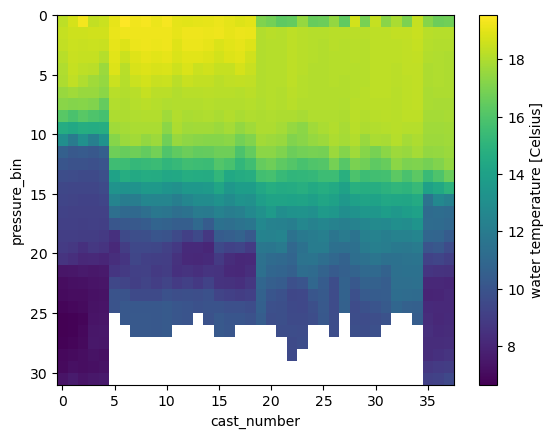

In [19]:
ds.temperature.plot()
plt.gca().invert_yaxis()

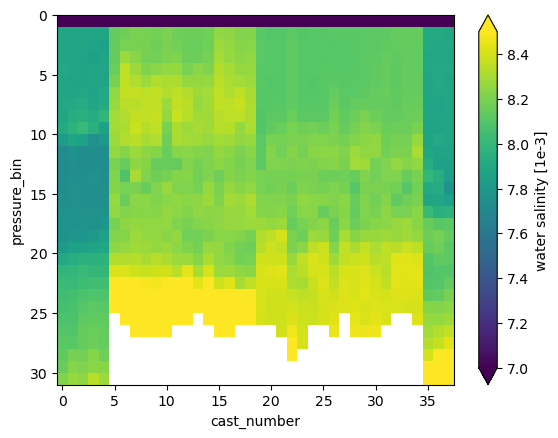

In [20]:
ds.salinity.plot(vmin=7, vmax=8.5)
plt.gca().invert_yaxis()

In [21]:
ds

<xarray.Dataset>
Dimensions:               (cast_number: 38, pressure_bin: 31)
Coordinates:
  * cast_number           (cast_number) int64 0 1 2 3 4 5 ... 32 33 34 35 36 37
  * pressure_bin          (pressure_bin) float64 0.5 1.5 2.5 ... 28.5 29.5 30.5
Data variables:
    pressure              (pressure_bin, cast_number) float64 0.5535 ... 30.52
    temperature           (pressure_bin, cast_number) float64 18.27 ... 9.437
    conductivity          (pressure_bin, cast_number) float64 5.498 ... 10.61
    chlorophyll           (pressure_bin, cast_number) float64 1.031 ... 0.1445
    salinity              (pressure_bin, cast_number) float64 3.651 ... 8.792
    oxygen_concentration  (pressure_bin, cast_number) float64 279.7 ... 242.3
    latitude              (pressure_bin, cast_number) float64 nan nan ... nan
    longitude             (pressure_bin, cast_number) float64 nan nan ... nan
    datetime              (pressure_bin, cast_number) datetime64[ns] 2023-09-...
Attributes:
    acknowledgement:      This study used data collected and made freely avai...
    creator_email:        callum.rollo@voiceoftheocean.org
    source:               Observational data from handheld CTD casts
    creator_name:         Callum Rollo
    creator_url:          https://observations.voiceoftheocean.org
    date_created:         2023-09-26 13:08:13.156673
    date_issued:          2023-09-26 13:08:13.156673
    institution:          Voice of the Ocean Foundation
    keywords:             CTD, Oceans, Ocean Pressure, Water Pressure, Ocean ...
    keywords_vocabulary:  GCMD Science Keywords
    title:                CTD from glider deployment/recovery
    disclaimer:           Data, products and services from VOTO are provided ...